In [3]:
import pandas as pd
import requests
import json
from tweepy import OAuthHandler
from tweepy import API
from tweepy import TweepError
from IPython.core.display import Image
import  matplotlib.pyplot as plt
import seaborn as sns

###  Gathering Data..

In [4]:
wrd = pd.read_csv('twitter_archive_enhanced.csv')

In [5]:
wrd.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
wrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [8]:
with open('image_predictions.tsv',mode='wb') as file:
        file.write(response.content)

In [9]:
imgpred = pd.read_csv('image_predictions.tsv',sep='\t')
imgpred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
imgpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
# Load credentials from json file
with open("twitter_credentials.json", "r") as file:  
    creds = json.load(file)
#creds


In [12]:
#create a tweepy API object that we will use to query for data from Twitter
consumer_key = creds['CONSUMER_KEY']
consumer_secret = creds['CONSUMER_SECRET']
access_token = creds['ACCESS_TOKEN']
access_token_secret = creds['ACCESS_SECRET']
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
auth_api = API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [13]:
# function to get tweets of a list of tweet_ids as json data
def get_tweet(tweet_id_list, api):
    tweet_json_list = []
    try:
        status = api.statuses_lookup(id_= tweet_id_list)
        
        for index in range(0,len(status)):           
            tweet_json = json.dumps(status[index]._json)
            tweet_json_list.append(tweet_json)            
        return tweet_json_list
    except TweepError as e:
        print(e)
        return []

In [207]:
#store each tweet's entire set of JSON data in a file called tweet_json.txt file
tweet_list = wrd['tweet_id'].tolist()
tweets_json_list =[]
start = 0
end = start + 100
final = len(tweet_list)
while end < final:
    if (end >= final):
        end = start + (final-index)
    tweet_sub_list = tweet_list[start:end]
    tweets_json_list = get_tweet(tweet_sub_list,auth_api)
    with open('tweet_json.txt',mode='a+') as file:
        for each in tweets_json_list:
            file.write(each)
            file.write('\n')
    start = end + 1
    end = start + 100


In [14]:
# Creating a dataframe with tweet ID, retweet count,favorite count, favorited, retweeted
tweet_list = []
with open('tweet_json.txt' , mode='r') as file:
    tweet_info = file.readline()
    
    while tweet_info:
        tw_info = json.loads(tweet_info)
        tweet_list.append({'tweet_id': tw_info['id'],
                           'retweet_count': tw_info['retweet_count'],
                           'fav_count': tw_info['favorite_count'],
                           'favorited' : tw_info['favorited'],
                           'retweeted' : tw_info['retweeted']})
        tweet_info = file.readline()
tweet_df = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'fav_count', 'favorited' ,'retweeted' ])
        
tweet_df.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289 entries, 0 to 2288
Data columns (total 5 columns):
tweet_id         2289 non-null int64
retweet_count    2289 non-null int64
fav_count        2289 non-null int64
favorited        2289 non-null bool
retweeted        2289 non-null bool
dtypes: bool(2), int64(3)
memory usage: 58.2 KB


### Assesing Data ..

In [15]:
# Display the wrd(we rate dogs) twitter enhanced archive
wrd

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [16]:
imgpred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
tweet_df

,tweet_id,retweet_count,fav_count,favorited,retweeted
0,876484053909872640,2429,18775,False,False
1,886366144734445568,3213,21180,False,False
2,877611172832227328,81,0,False,False
3,888078434458587136,3516,21741,False,False
4,891689557279858688,8693,42151,False,False
5,879492040517615616,3207,23403,False,False
6,878604707211726852,7305,30280,False,False
7,879674319642796034,10,313,False,False
8,884876753390489601,5822,27920,False,False
9,882992080364220416,3949,23939,False,False


#### Visual Assesment 
*  The columns in wrd namely in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id	retweeted_status_user_id are missing values. 
*  The source field has the url wrapped inside an 'a' tag. we need to extract the url.
*  The name field has invalid names like 'a', 'quite', 'such', 'the' and some rows are missing names.
*  The doggo, floofer, pupper and puppo should have boolean values 'True' or 'False' instead of none.
*  The tables imgpred and tweet_info seem to be ok on a visual assesment

In [18]:
wrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
wrd.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2195,668872652652679168,NaN,NaN,2015-11-23 19:24:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Amélie. She is a confident white colle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668872652...,11,10,Amélie,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9,10,a,None,None,None,None
604,798585098161549313,NaN,NaN,2016-11-15 17:54:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Timison. He just told a...,6.671828e+17,4.196984e+09,2015-11-19 03:29:07 +0000,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
2133,670073503555706880,NaN,NaN,2015-11-27 02:55:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He wants to be a power drill. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670073503...,10,10,Winston,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
1725,680070545539371008,NaN,NaN,2015-12-24 17:00:27 +0000,"<a href=""https://about.twitter.com/products/tw...",Say hello to Emmie. She's trapped in an orname...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680070545...,9,10,Emmie,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


In [20]:
wrd['name'].describe()

count     2356
unique     957
top       None
freq       745
Name: name, dtype: object

In [21]:
wrd['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
an             7
Buddy          7
Bailey         7
Daisy          7
Toby           7
Stanley        6
Jax            6
Jack           6
Rusty          6
Leo            6
Oscar          6
Dave           6
Koda           6
Bella          6
Milo           6
Scout          6
Finn           5
            ... 
Karl           1
Jazz           1
Jed            1
Bowie          1
Katie          1
Mary           1
Izzy           1
Obie           1
Clarq          1
Einstein       1
Finnegus       1
Kellogg        1
Dook           1
Timmy          1
Dudley         1
Link           1
Grizz          1
Kenzie         1
Vince          1
Leonidas       1
Chaz           1
Anthony        1
Schnitzel      1
Buckley        1
Charleson      1
Rontu          1
Mo             1
Jonah         

In [22]:
wrd[wrd['name'] == 'such']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None


In [23]:
wrd[wrd['name'] == 'quite']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507...,2,10,quite,None,None,None,None


In [24]:
wrd['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [25]:
wrd[wrd['rating_numerator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [26]:
wrd['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [27]:
wrd[wrd['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [28]:

wrd['doggo'].describe()

count     2356
unique       2
top       None
freq      2259
Name: doggo, dtype: object

In [29]:
wrd['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [30]:
wrd['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [31]:
wrd['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [32]:
wrd['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [33]:
imgpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
imgpred['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [35]:
imgpred['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
teddy                         18
beagle                        18
Maltese_dog                   18
Eskimo_dog                    18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [36]:
imgpred['p1_conf'].describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [37]:
imgpred['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [38]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289 entries, 0 to 2288
Data columns (total 5 columns):
tweet_id         2289 non-null int64
retweet_count    2289 non-null int64
fav_count        2289 non-null int64
favorited        2289 non-null bool
retweeted        2289 non-null bool
dtypes: bool(2), int64(3)
memory usage: 58.2 KB


In [39]:
tweet_df.sample(10)

,tweet_id,retweet_count,fav_count,favorited,retweeted
1225,709449600415961088,645,2370,False,False
1938,673686845050527744,463,1501,False,False
1961,674082852460433408,181,781,False,False
280,844704788403113984,11263,41055,False,False
389,825120256414846976,1436,0,False,False
878,758041019896193024,418,2929,False,False
1642,681193455364796417,1634,3962,False,False
592,789280767834746880,5584,0,False,False
1350,704859558691414016,598,2410,False,False
2199,668256321989451776,650,1351,False,False


#### Programatic Assesment 
##### wrd table
*  The columns in wrd namely in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id	retweeted_status_user_id, retweeted_status_timestamp are missing a lot of values. All these are not retweets and should be kept.
*  The column expanded_urls also has (2356-2297 = 59) missing values.
*  The timestamp field is string and needs to be converted to datetime
*  The columns doggo, floofer, pupper and puppo need to be converted to boolean categorical type.
*  There are certain rows which are retweets which are identified by 'RT' in the text field. These rows need to be removed.
*  There are 745 rows which have the name of the dog set to 'None', 55 rows which have the name of the dog set to 'a' and 8 rows which have the name of the dog set to 'the' and 7 rows which have the name of the dog set to 'an'. these need to be removed.
*   The rows 169 and 193 have the name of the dog set to "quite" and seem to be duplicates. We need to remove them.
*   The row 315 and 1016 have rating_numerator field as 0 value. Hence these rows need to be removed
*   The row 313 has rating_denominator field as 0 value. Hence this row needs to be removed.
*   The timestamp column can be split into date and time columns.
  


##### imgpred table
* No issues found in imgpred table

##### tweet_df table
* No issues found in tweet_df table



### Overall Assesment 

#### Data Quality issues
*  The tweets which have non null values in fields in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id	retweeted_status_user_id, retweeted_status_timestamp are retweets/not original tweets and need to be removed.
*  The column expanded_urls also has (2356-2297 = 59) missing values.
*  The timestamp field is string and needs to be converted to datetime
*  The columns doggo, floofer, pupper and puppo need to be converted to boolean categorical type.
*  There are 745 rows which have the name of the dog set to 'None', 55 rows which have the name of the dog set to 'a' and 8 rows which have the name of the dog set to 'the' and 7 rows which have the name of the dog set to 'an'. these need to be removed.
*  The source field has the url wrapped inside an 'a' tag. we need to extract the url.
*  The rows 169 and 193 have the name of the dog set to "quite" and seem to be duplicates. We need to remove them.
*  The doggo, floofer, pupper and puppo should have boolean values 'True' or 'False' instead of none.
*   The row 315 and 1016 have rating_numerator field as 0 value. Hence these rows need to be removed
*   The row 313 has rating_denominator field as 0 value. Hence this row needs to be removed.

#### Tidy Data issues
*  After retweets and not original tweets are removed we can remove the columns n_reply_to_status_id, in_reply_to_user_id, retweeted_status_id retweeted_status_user_id, retweeted_status_timestamp
*  The timestamp column can be split into date and time columns.
*  We need to join the wrd table with imgpred and tweet_df table using the tweet id.


## Cleaning the data

In [40]:
wrd_clean = wrd.copy()
imgpred_clean = imgpred.copy()
tweet_df_clean = tweet_df.copy()

### Remove rows in wrd table which are retweets

##### Define
######  We shall find all row ids which have non values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id retweeted_status_user_id, retweeted_status_timestamp and delete them

##### Code

In [41]:
wrd_clean = wrd_clean[~(wrd_clean.in_reply_to_status_id.notnull())]
wrd_clean = wrd_clean[~(wrd_clean.retweeted_status_timestamp.notnull())]

##### Test

In [42]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Remove rows in wrd table which have empty values in expanded_urls column

##### Define
######  We shall keep only rows which have non empty values in expanded_urls column

##### Code

In [43]:
wrd_clean = wrd_clean[wrd_clean.expanded_urls.notnull()]

##### Test

In [44]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null object
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: float64(4), int64(3), object(10)

### The timestamp field is string and needs to be converted to datetime 

##### Define
######  We shall convert the timestamp field from string to datetime

##### Code

In [45]:
wrd_clean.timestamp = pd.to_datetime(wrd_clean.timestamp)



##### Test

In [46]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null datetime64[ns]
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: datetime64[ns](1), float

### The columns doggo, floofer, pupper and puppo need to be converted to boolean categorical type.

##### Define
######  We shall convert the columns doggo, floofer, pupper and puppo to boolean categorical type

##### Code

In [47]:
wrd_clean['doggo'] = wrd_clean['doggo'] == 'doggo'
wrd_clean['floofer'] = wrd_clean['floofer'] == 'floofer'
wrd_clean['pupper'] = wrd_clean['pupper'] == 'pupper'
wrd_clean['puppo'] = wrd_clean['puppo'] == 'puppo'


##### Test

In [48]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null datetime64[ns]
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         2094 non-null bool
floofer                       2094 non-null bool
pupper                        2094 non-null bool
puppo                         2094 non-null bool
dtypes: bool(4), datetime64[ns](1), floa

### There are rows which have the name of the dog set to 'None', rows which have the name of the dog set to 'a' and rows which have the name of the dog set to 'the' and rows which have the name of the dog set to 'an'. these need to be removed.

##### Define
######  We shall find the rows where the name of the dog set to 'None',name of the dog set to 'a', the name of the dog set to 'the' and which have the name of the dog set to 'an'. Then we shall delete thes rows

##### Code

In [49]:
wrd_clean = wrd_clean[~(wrd_clean['name'] == 'None')]
wrd_clean = wrd_clean[~(wrd_clean['name'] == 'a')]
wrd_clean = wrd_clean[~(wrd_clean['name'] == 'the')]
wrd_clean = wrd_clean[~(wrd_clean['name'] == 'an')]

##### Test

In [50]:
wrd_clean[wrd_clean['name'] == 'None']



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [51]:
wrd_clean[wrd_clean['name'] == 'a']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [52]:
wrd_clean[wrd_clean['name'] == 'the']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [53]:
wrd_clean[wrd_clean['name'] == 'an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### The rows which have the name of the dog set to "quite" seem to be duplicates. We need to remove them.

##### Define
######  We shall find the  rows which have name set to 'quite' and if found as duplciates will remove them

##### Code

In [54]:
wrd_clean[wrd_clean['name'] == 'quite']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,False,False,False,False
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,False,False,False,False
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507...,2,10,quite,False,False,False,False


###### The rows which have name set to 'quite' are 169,193,2326. We see that row 2326 has invalid rating numerator as 2 and rows 169 and 193 have the same name and same rating. Hence we shall delete row 2326 and row 193.

In [55]:
wrd_clean = wrd_clean.drop([193,2326],axis=0)

##### Test

In [56]:
wrd_clean[wrd_clean['name'] == 'quite']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,False,False,False,False


### The rows which have the rating_numerator field as 0 value. These rows need to be removed.

##### Define
######  We shall find the  rows which have the rating_numerator field as 0 value and will remove them

##### Code

In [57]:
wrd_clean[wrd_clean['rating_numerator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


###### No rows have rating_numerator set to 0

### The rows which have the rating_denominator field as 0 value. These rows need to be removed.

##### Define
######  We shall find the  rows which have the rating_denominator field as 0 value and will remove them

##### Code

In [58]:
wrd_clean[wrd_clean['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


###### No rows have rating_denominator set to 0

### Remove the columns n_reply_to_status_id, in_reply_to_user_id, retweeted_status_id retweeted_status_user_id, retweeted_status_timestamp

##### Define
######  We shall remove the  rows columns n_reply_to_status_id, in_reply_to_user_id, retweeted_status_id retweeted_status_user_id, retweeted_status_timestamp after verifying that they have 0 values

##### Code

In [59]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 0 to 2325
Data columns (total 17 columns):
tweet_id                      1423 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1423 non-null datetime64[ns]
source                        1423 non-null object
text                          1423 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1423 non-null object
rating_numerator              1423 non-null int64
rating_denominator            1423 non-null int64
name                          1423 non-null object
doggo                         1423 non-null bool
floofer                       1423 non-null bool
pupper                        1423 non-null bool
puppo                         1423 non-null bool
dtypes: bool(4), datetime64[ns](1), floa

In [60]:
wrd_clean = wrd_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id", 
                            "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1)


##### Test

In [61]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 0 to 2325
Data columns (total 12 columns):
tweet_id              1423 non-null int64
timestamp             1423 non-null datetime64[ns]
source                1423 non-null object
text                  1423 non-null object
expanded_urls         1423 non-null object
rating_numerator      1423 non-null int64
rating_denominator    1423 non-null int64
name                  1423 non-null object
doggo                 1423 non-null bool
floofer               1423 non-null bool
pupper                1423 non-null bool
puppo                 1423 non-null bool
dtypes: bool(4), datetime64[ns](1), int64(3), object(4)
memory usage: 105.6+ KB


### The timestamp column can be split into date and time columns.

##### Define
######  We shall create two new columns date and time from the timestamp column and then delete the time stamp column

##### Code

In [62]:
wrd_clean['date'], wrd_clean['time'] = wrd_clean.timestamp.astype(str).str.split().str

##### Test

In [63]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 0 to 2325
Data columns (total 14 columns):
tweet_id              1423 non-null int64
timestamp             1423 non-null datetime64[ns]
source                1423 non-null object
text                  1423 non-null object
expanded_urls         1423 non-null object
rating_numerator      1423 non-null int64
rating_denominator    1423 non-null int64
name                  1423 non-null object
doggo                 1423 non-null bool
floofer               1423 non-null bool
pupper                1423 non-null bool
puppo                 1423 non-null bool
date                  1423 non-null object
time                  1423 non-null object
dtypes: bool(4), datetime64[ns](1), int64(3), object(6)
memory usage: 127.8+ KB


### The date and time fields are strings and need to be converted to datetime 

##### Define
######  We shall convert the date and time fields from string to datetime

##### Code

In [64]:
wrd_clean.date = pd.to_datetime(wrd_clean.date)
wrd_clean.time = pd.to_datetime(wrd_clean.time)

##### Test

In [65]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 0 to 2325
Data columns (total 14 columns):
tweet_id              1423 non-null int64
timestamp             1423 non-null datetime64[ns]
source                1423 non-null object
text                  1423 non-null object
expanded_urls         1423 non-null object
rating_numerator      1423 non-null int64
rating_denominator    1423 non-null int64
name                  1423 non-null object
doggo                 1423 non-null bool
floofer               1423 non-null bool
pupper                1423 non-null bool
puppo                 1423 non-null bool
date                  1423 non-null datetime64[ns]
time                  1423 non-null datetime64[ns]
dtypes: bool(4), datetime64[ns](3), int64(3), object(4)
memory usage: 127.8+ KB


### We shall now delete the timestamp column

##### Define
######  We shall delete the timestamp column

##### Code

In [66]:
wrd_clean = wrd_clean.drop(['timestamp'], axis=1)

##### Test

In [67]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 0 to 2325
Data columns (total 13 columns):
tweet_id              1423 non-null int64
source                1423 non-null object
text                  1423 non-null object
expanded_urls         1423 non-null object
rating_numerator      1423 non-null int64
rating_denominator    1423 non-null int64
name                  1423 non-null object
doggo                 1423 non-null bool
floofer               1423 non-null bool
pupper                1423 non-null bool
puppo                 1423 non-null bool
date                  1423 non-null datetime64[ns]
time                  1423 non-null datetime64[ns]
dtypes: bool(4), datetime64[ns](2), int64(3), object(4)
memory usage: 116.7+ KB


### We need to join the wrd_clean table with imgpred_clean and tweet_df_clean table using the tweet id.

##### Define
######  We shall join the wrd_clean table with imgpred_clean and tweet_df_clean table using the tweet id.

##### Code

In [137]:
temp = pd.merge(wrd_clean, imgpred_clean, on='tweet_id', how='inner')
final_df_clean = pd.merge(temp, tweet_df_clean, on='tweet_id', how='inner')

##### Test

In [138]:
final_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363 entries, 0 to 1362
Data columns (total 28 columns):
tweet_id              1363 non-null int64
source                1363 non-null object
text                  1363 non-null object
expanded_urls         1363 non-null object
rating_numerator      1363 non-null int64
rating_denominator    1363 non-null int64
name                  1363 non-null object
doggo                 1363 non-null bool
floofer               1363 non-null bool
pupper                1363 non-null bool
puppo                 1363 non-null bool
date                  1363 non-null datetime64[ns]
time                  1363 non-null datetime64[ns]
jpg_url               1363 non-null object
img_num               1363 non-null int64
p1                    1363 non-null object
p1_conf               1363 non-null float64
p1_dog                1363 non-null bool
p2                    1363 non-null object
p2_conf               1363 non-null float64
p2_dog                1363 no

## Storing the final dataframe

In [139]:
final_df_clean.to_csv('twitter_archive_master.csv')

## Insights and Visualization

### Names of the top ten rated dogs

In [140]:
final_df_clean.sort_values('rating_numerator',ascending=[False])


,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,fav_count,favorited,retweeted
579,749981277374128128,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,False,False,False,...,sunglasses,0.080822,False,sunglass,0.050776,False,2706,5504,False,False
660,731156023742988288,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,False,False,False,...,breakwater,0.051351,False,king_penguin,0.049444,False,1387,4086,False,False
405,786709082849828864,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,False,False,False,...,Persian_cat,0.122978,False,chow,0.102654,True,6840,19859,False,False
720,716439118184652801,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,False,False,False,...,malamute,0.317053,True,Eskimo_dog,0.273419,True,238,2516,False,False
443,778027034220126208,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,False,False,True,...,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,1817,7138,False,False
307,810984652412424192,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,False,False,False,...,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,1608,5818,False,False
53,878057613040115712,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,False,False,False,...,Boston_bull,0.078799,True,toy_terrier,0.015243,True,6905,42041,False,False
203,831911600680497154,"<a href=""http://twitter.com/download/iphone"" r...",Meet Kuyu. He was trapped in a well for 10 day...,https://twitter.com/dog_rates/status/831911600...,14,10,Kuyu,False,False,False,...,Great_Dane,0.047418,True,Leonberg,0.017943,True,7225,29679,False,False
77,870063196459192321,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clifford. He's quite large. Also red. Goo...,https://twitter.com/dog_rates/status/870063196...,14,10,Clifford,False,False,False,...,envelope,0.280722,False,book_jacket,0.043786,False,8535,36993,False,False
546,755206590534418437,"<a href=""http://twitter.com/download/iphone"" r...",This is one of the most inspirational stories ...,https://twitter.com/dog_rates/status/755206590...,14,10,one,True,False,False,...,printer,0.008600,False,carton,0.004533,False,5951,17768,False,False


#### It looks like the rating_numerator and rating_denominator of first six rows are perhaps incorrect. Let's corelate them with the tweets and check

In [141]:
final_df_clean.loc[579]['text']

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [164]:
final_df_clean.loc[660]['text']

'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

In [165]:
final_df_clean.loc[660]['jpg_url']

'https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg'

#### The denominator must be a typo. So let's set it to 10

In [144]:
final_df_clean.at[660,'rating_denominator'] = 10

In [145]:
final_df_clean.loc[405]['text']

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

#### Logan's ratings are seen to be wrong. Let's correct them

In [148]:
final_df_clean.at[405,'rating_numerator'] = 9

In [149]:
final_df_clean.loc[405]['rating_numerator']

9

In [150]:
final_df_clean.iloc[720]['text']

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

#### Bluebert's ratings are seen to be wrong. Let's correct them

In [151]:
final_df_clean.at[720,'rating_numerator'] = 11

In [153]:
final_df_clean.at[720,'rating_denominator'] = 10

In [154]:
final_df_clean.loc[720]['rating_numerator']

11

In [155]:
final_df_clean.iloc[307]['text']

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

#### Sam doesn't seem to have a rating. Hence let's drop this row

In [156]:
final_df_clean = final_df_clean.drop([307],axis=0)

#### Let's again try to find the top ten rated dogs

In [157]:
final_df_clean.sort_values('rating_numerator',ascending=[False])['name'].head(10)

579     Atticus
660        this
443      Sophie
264          Bo
263       Sunny
290        Gary
53         Emmy
200      Smiley
203        Kuyu
77     Clifford
Name: name, dtype: object

#### The name of the second dog in the list above looks improper. Let's verify and correct it.

In [158]:
final_df_clean.sort_values('rating_numerator',ascending=[False]).loc[660]['text']

'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

#### So as seen above there is no name but we can do better by naming it as 'doggos_squad' instead of 'this'

In [159]:
final_df_clean.at[660,'name'] = 'doggos_squad'

In [160]:
final_df_clean.sort_values('rating_numerator',ascending=[False])['name'].head(10)

579         Atticus
660    doggos_squad
443          Sophie
264              Bo
263           Sunny
290            Gary
53             Emmy
200          Smiley
203            Kuyu
77         Clifford
Name: name, dtype: object

### Images of the top two rated dogs

In [166]:
(final_df_clean.loc[579]['jpg_url'],final_df_clean.loc[660]['jpg_url'])

('https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg',
 'https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg')

### Atticus

![Image of Atticus](https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg)

### doggos_squad

![Image of this](https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg)

## Name and image of the most favorited dog

In [171]:
final_df_clean.sort_values('fav_count',ascending=[False])
final_df_clean.sort_values('fav_count',ascending=[False])[['name','fav_count']].head(10)

,name,fav_count
87,Jamesy,124280
318,Stephan,122875
47,Duddles,105855
264,Bo,93600
108,quite,92339
75,Zoey,83313
54,Aja,79868
1077,Kenneth,79090
27,Earl,77468
210,Lilly,71884


In [170]:
final_df_clean.loc[87]['jpg_url']


'https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg'

### Jamesy

![Image of Jamesy](https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg)

## Mean probability values for p1,p2 and p3 dog predictions

In [172]:
# Mean p1,p2,p3 dog prediction
(final_df_clean['p1_conf'].mean(),final_df_clean['p2_conf'].mean(),final_df_clean['p3_conf'].mean())

(0.5993526168135097, 0.13420073167255037, 0.06058707239564679)

## Mean favorite count of doggo, floofer, pupper  and puppo

In [173]:
(final_df_clean.groupby('doggo')['fav_count'].mean()[1],final_df_clean.groupby('floofer')['fav_count'].mean()[1],
 final_df_clean.groupby('pupper')['fav_count'].mean()[1],final_df_clean.groupby('puppo')['fav_count'].mean()[1])


(17420.418604651164, 10712.25, 7458.6991869918702, 12250.799999999999)

##  The relationship between the favorite count and retweet count

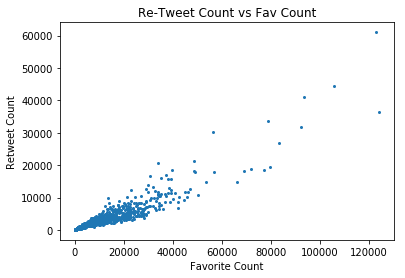

In [174]:
%matplotlib inline
plt.plot( 'fav_count', 'retweet_count', data=final_df_clean, linestyle='', marker='o', markersize=2);
plt.xlabel('Favorite Count');
plt.ylabel('Retweet Count');
plt.title('Re-Tweet Count vs Fav Count', loc='center');


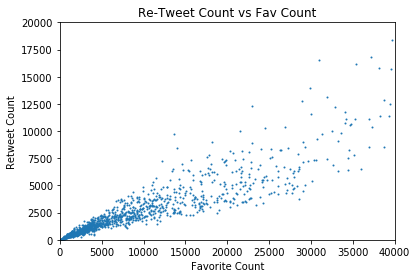

In [175]:
%matplotlib inline
plt.plot( 'fav_count', 'retweet_count', data=final_df_clean, linestyle='', marker='o', markersize=1);
plt.xlim(0,40000);
plt.ylim(0,20000);
plt.xlabel('Favorite Count');
plt.ylabel('Retweet Count');
plt.title('Re-Tweet Count vs Fav Count', loc='center');


### There seems to be a linear relationship between fav_count and retweet_count

## Histograms for p1,p2 and p3 probabilities

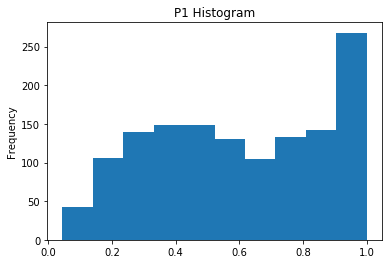

In [176]:
final_df_clean['p1_conf'].plot(title='P1 Histogram',kind='hist');

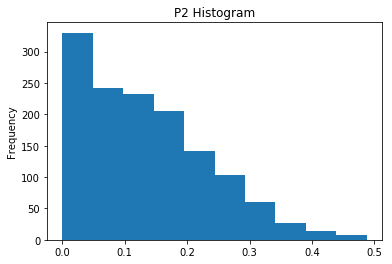

In [177]:
final_df_clean['p2_conf'].plot(title='P2 Histogram',kind='hist');

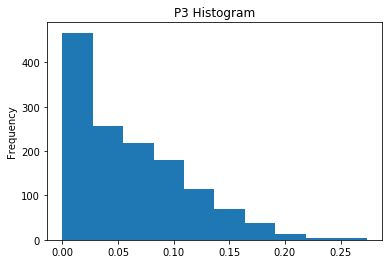

In [178]:
final_df_clean['p3_conf'].plot(title='P3 Histogram',kind='hist');